                  Neighbourhood_name  neighbourhood_id  population  \
0             West Humber-Clairville                 1       33312   
1  Mount Olive-Silverstone-Jamestown                 2       32954   
2       Thistletown-Beaumond Heights                 3       10360   
3                    Rexdale-Kipling                 4       10529   
4                   Elms-Old Rexdale                 5        9456   

   neighbourhood_area  mean_pm25_2000_2016  2021_LIMAT_PC  
0                  30                 8.97            8.7  
1                   5                 8.96           15.6  
2                   3                 8.99           11.8  
3                   2                 8.99           13.5  
4                   3                 9.04           12.4  


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

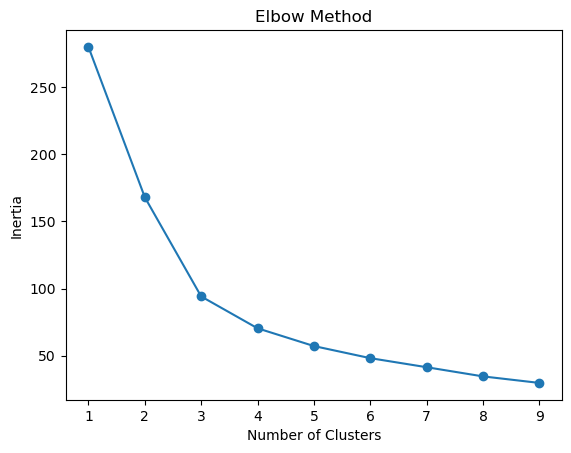

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
# Step 1: Load libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 2: Load data
data = pd.read_csv('~/this_file/copy.csv')

# Step 3: Inspect data
print(data.head())

# Step 4: Preprocess data
features = data[['mean_pm25_2000_2016', '2021_LIMAT_PC']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 5: Determine number of clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Step 6: Apply clustering (choose k based on the Elbow Curve)
k = 3  # Example: Assume the optimal number of clusters is 3
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)

# Step 7: Analyze and visualize clusters
#plt.scatter(data['mean_pm25_2000_2016'], data['2021_LIMAT_PC'], c=data['Cluster'], cmap='viridis')
#plt.xlabel('PM2.5 Concentration')
#plt.ylabel('LIM-AT (%)')
#plt.title('Clusters of Neighbourhoods')
#plt.colorbar(label='Cluster')
#plt.show()



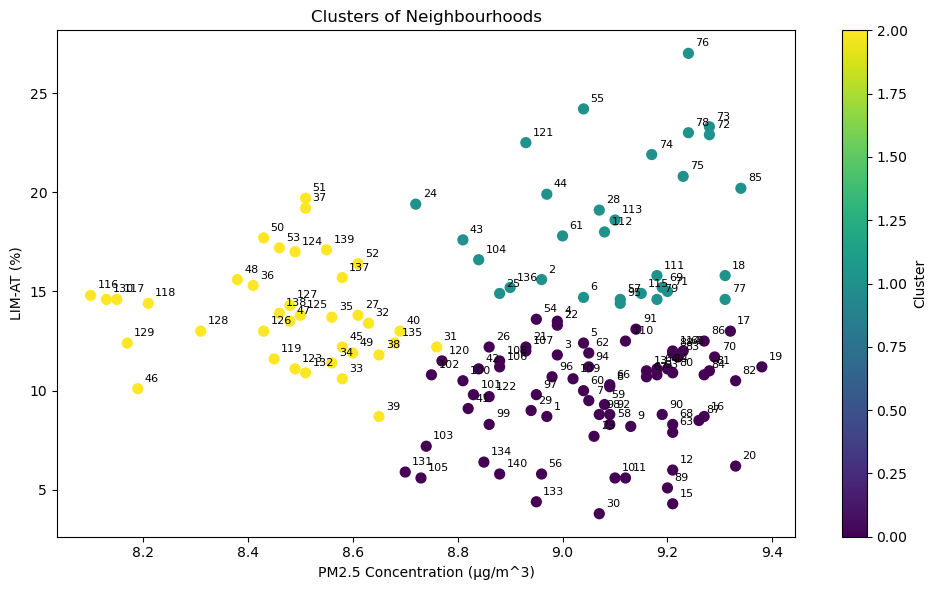

In [11]:
# Step 7: Analyze and visualize clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    data['mean_pm25_2000_2016'], 
    data['2021_LIMAT_PC'], 
    c=data['Cluster'], 
    cmap='viridis', 
    s=50
)

# Add labels for neighborhoods
for i, label in enumerate(data['neighbourhood_id']):  # Adjust 'Neighbourhood' to match your column name
    plt.annotate(
        label, 
        (data['mean_pm25_2000_2016'][i], data['2021_LIMAT_PC'][i]),
        textcoords="offset points", 
        xytext=(5, 5), 
        ha='left',
        fontsize=8
    )

# Plot configuration
plt.xlabel('PM2.5 Concentration (μg/m^3)')
plt.ylabel('LIM-AT (%)')
plt.title('Clusters of Neighbourhoods')
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()


# Step 8: Output critical clusters
critical_cluster = data[data['Cluster'] == 1]  # Example: Replace with the actual cluster
#critical_cluster.to_csv('~/this_file/.csv', index=False)